<h1 style="text-align:center; font-size:24">
STSCI 3740 Final Project<br>
</h1>

#### Authors: Melissa Eckert, Vanessa Rosero, Akhil Damani & Ethan Bershad

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# load data 
data = pd.read_csv("data/car_details_v4.csv")

### Part 1: Data Description

This project utilizes a dataset that contains detailed information about used cars in India. The dataset was made by web scraping which involves collecting detailed information about used cars such as price, model, seller details, and etc from different websites across the web. The dataset includes features such as make, model, price, manufacturing year, selling price, kilometers driven, fuel type, seller type, transmission type, ownership history, etc. We discovered during the data exploration process that there was null values in the data set in the engine, max power, max torque, drive train, length, width, height, seating capacity, and fuel tank capacity. We removed these values to reduce any null errors we might face in our statistical analysis. We also cleaned the data values by removing parts of strings and converting into integers to make the regression easier. 

###  Part 2: Data Exploration

<AxesSubplot:>

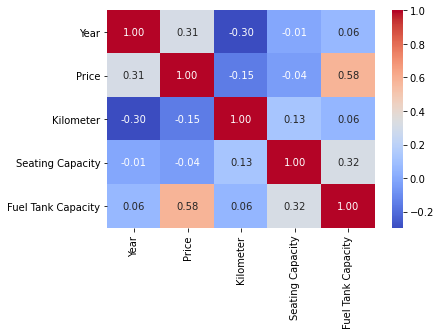

In [3]:
corr = data[["Year","Price","Kilometer", "Seating Capacity", "Fuel Tank Capacity" ]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')


<AxesSubplot:xlabel='Fuel Tank Capacity', ylabel='Price'>

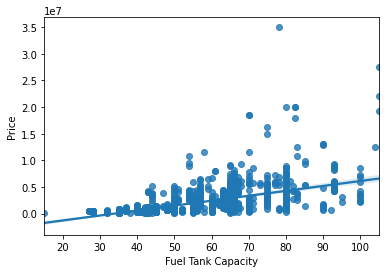

In [4]:
target = data.Price
df = data.drop(columns = ['Price'])
sns.regplot(x=data['Fuel Tank Capacity'], y=target, data=df, label='Seating Capacity')

The regression line shows us a positive correlation with a smaller confidence interval indicated by the small shaded region. Significant cluster in the range of 40 to 80 liters. 

<AxesSubplot:xlabel='Kilometer', ylabel='Price'>

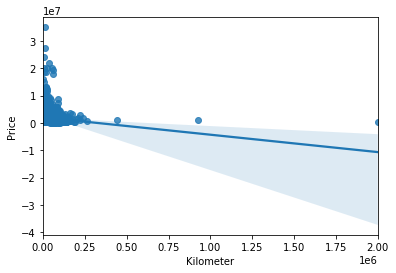

In [5]:
target = data.Price
df = data.drop(columns = ['Price'])
sns.regplot(x=data['Kilometer'], y=target, data=df, label='Seating Capacity')

The cluster of points near the origin suggests that cars with lower kilometers (lower mileages) have lower prices. There are potential outliers that could skew the data. The regression line slopes slightly downward, implying a negative correlation between kilometers driven and price. This makes sense, as higher mileage typically decreases a car's resale value.

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


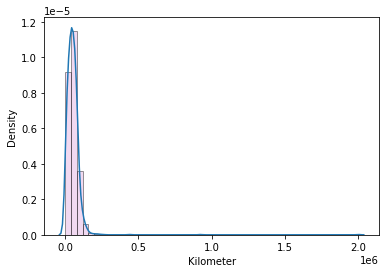

In [6]:
sns.distplot(data["Kilometer"], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

From the graph, we can verify that the kilometer variable does contain a significant amount of outliers because of the long tail to the right. We can see the 

### Part 3: Data preprocessing

In [7]:
data = data.dropna()
data["Engine"] = data["Engine"].str.replace(' cc', '').astype(int)

### Part 4: Multiple Linear Regression 

For Multiple Linear Regression, we want to find the most relevant variables to include in the model. We decided to use backward selection because the dataset included a large amount of potential predictors. From the data exploration, we found that many variables did not have a lot of predictive power and had low correlation. Although best subset selection is better at variable selection, we do not have the computing power for the amount of predictors in the dataset.

In [9]:
#Backward selection 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

data_encoded = pd.get_dummies(data, columns=['Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'], drop_first=True)

X = data_encoded.drop(columns=['Make', 'Model', 'Price', 'Engine', 'Max Power', 'Max Torque'])
y = data_encoded['Price']

lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=5, forward=False, verbose=1, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.7s
Features: 109/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.6s
Features: 108/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.2s
Features: 107/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.1s
Features: 106/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.3s
Features: 105/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.0s
Features: 104/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.0s
Features: 103/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.9s
Features: 102/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.8s
Features: 101/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.7s
Features: 100/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.5s
Features: 99/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.5s
Features: 98/5[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.4s
Features: 97/5[Parallel(n_job

In [10]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Year', 'Length', 'Seating Capacity', 'Fuel Tank Capacity', 'Drivetrain_FWD']


In [13]:
X = data_encoded[['Year', 'Length', 'Seating Capacity', 'Fuel Tank Capacity', 'Drivetrain_FWD']]
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficients: [  186483.16662416     1723.83045711  -686756.26346673    21266.30257536
 -1508251.44639513]
Intercept: -378225220.42671525
Mean Squared Error (MSE): 6521716944766.441
R-squared (R2): 0.4429021563375629


From backward variable selection, we discovered that the five most important variables are Year, Length, Seating Capacity, Fuel Tank Capacity, and Drivetrain FWD. By using the five most important predictors in the Multiple Linear Regression, we were able to increase the r-squared value to 0.4429 compared to the r-squared value computed from using all the predictors 0.3791. Newer models (Year) and cars with bigger fuel tanks tend to have higher prices, while Front-Wheel Drive vehicles are associated with lower prices compared to other drive trains. Weirdly, seating capacity shows a negative relationship with price, which may indicate underlying multicollinearity. The r-squared value is lower than we wanted and might indicate a non-linear relationship. 